# Pymaceuticals Inc.
---

### Analysis
* Positive Trend: The findings suggest a possible correlation between mouse weight and average tumor volume in the Capmulin regimen. The heavier mice may exhibit larger tumors.
* Campomulin and Ramicane: These two treatments show a lower median tumor volume compared to Infubinol and Ceftamin. These findings suggest that Campomulin and Ramicane treatments may be promising durg candidates due to their potential for reduced tumor size and potentially more consistent treatment outcomes.
* Infubinol: The Infubinol data exhibits an outlier, indicating that treatment outcomes for this drug were more variable than for other treatments.  This suggests that Infubinol may have a more significant impact on a subset of mice, leading to a wider range of responses.
* The bar plot showing that Capomulin and Ramicane have the highest number of timepoints, indicating that these regimens were used on a larger number of mice or had longer observation periods. This finding suggest that these two drugs were considered more promising or were prioritized in the study. 


In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata,on='Mouse ID', how='left')


# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [129]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(duplicate_mouse_ids)

['g989']


In [130]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
print(num_mice)


249


In [131]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Print the data for the duplicate mouse IDs
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [132]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [133]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df['Mouse ID'].nunique()
print(num_mice)

248


## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_df = grouped_df.rename(columns={
	    'mean': 'Mean Tumor Volume',
	    'median': 'Median Tumor Volume',
	    'var': 'Tumor Volume Variance',
	    'std': 'Tumor Volume Std. Dev.',
	    'sem': 'Tumor Volume Std. Err.'})

summary_table=grouped_df
summary_table.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [135]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Add "Tumor Volume (mm3)" text above the statistics row
grouped_df.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], grouped_df.columns])

grouped_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

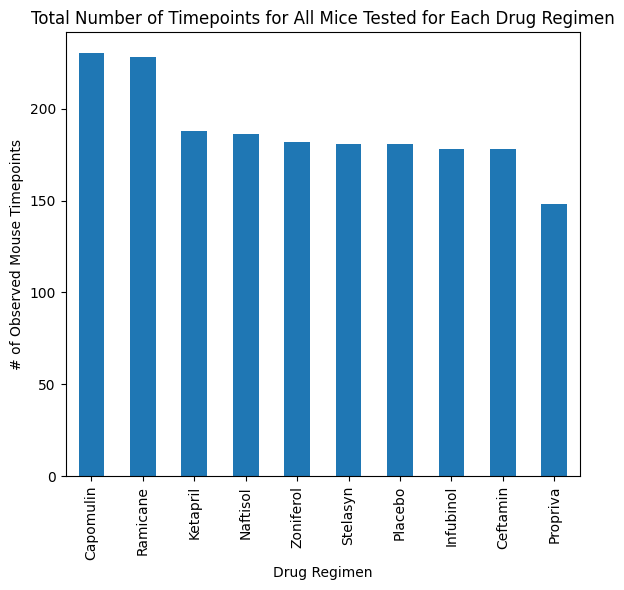

In [136]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Define the desired order of drug regimens
drug_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

# Count timepoints for each drug regimen
timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count().loc[drug_order]

#Generate a bar plot using Pandas
timepoint_counts.plot(kind='bar', figsize=(6, 6))

# Create bar chart
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

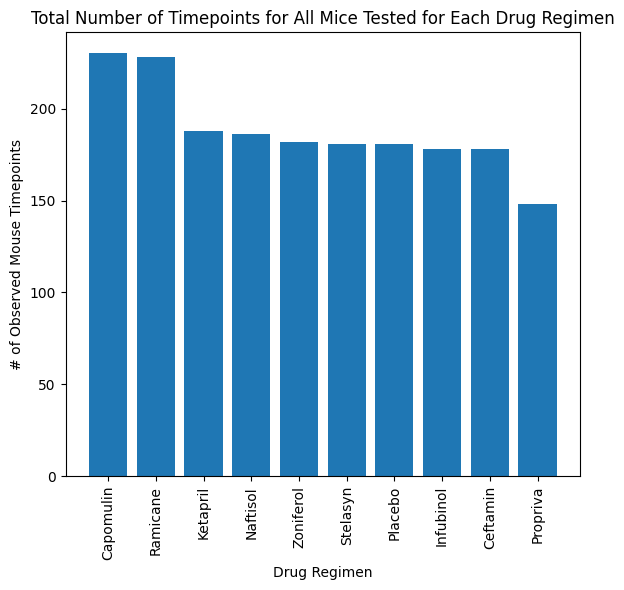

In [137]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Define the desired order of drug regimens
drug_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

# Count timepoints for each drug regimen
timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count().loc[drug_order]

# Create bar chart
plt.figure(figsize=(6, 6))
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


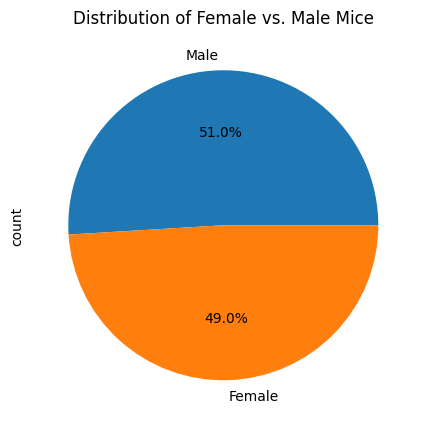

In [138]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_dist=clean_df['Sex'].value_counts()

# Make the pie chart
gender_dist.plot(kind='pie', autopct='%1.1f%%', startangle=360, figsize=(5, 6))
plt.title('Distribution of Female vs. Male Mice')
plt.show()

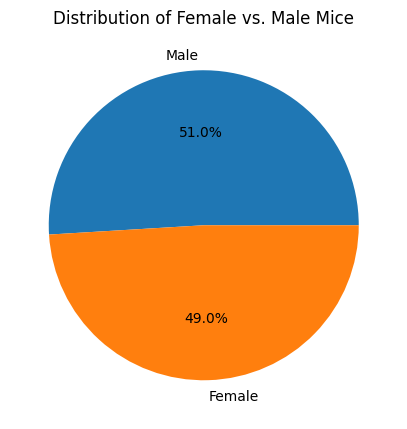

In [139]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_dist=clean_df['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(5, 6))
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', startangle=360)
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = merged_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_final_df = pd.merge(last_timepoint_df, merged_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_final_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [141]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_final_df[merged_final_df['Drug Regimen']==drug]["Tumor Volume (mm3)"] 

    # add subset
    tumor_vol_list.append(drug_df)

    # Determine outliers using upper and lower bounds
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_df.loc[(drug_df < lower_bound) | (drug_df > upper_bound)]
    print(f"{drug} 'potential outliers : {outliers}") 

Capomulin 'potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane 'potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 'potential outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin 'potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Bim\AppData\Local\Temp\ipykernel_16048\2428669955.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops={'markerfacecolor': 'red', 'markeredgecolor': 'black','markersize': 8})


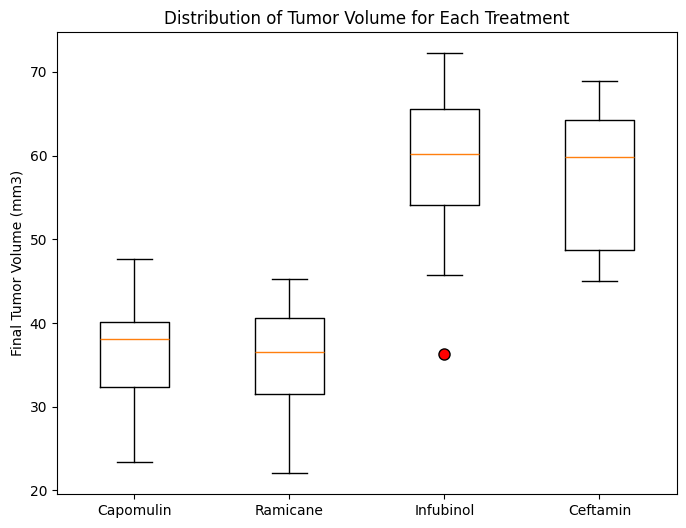

In [142]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops={'markerfacecolor': 'red', 'markeredgecolor': 'black','markersize': 8})
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment')
plt.show()

## Line and Scatter Plots

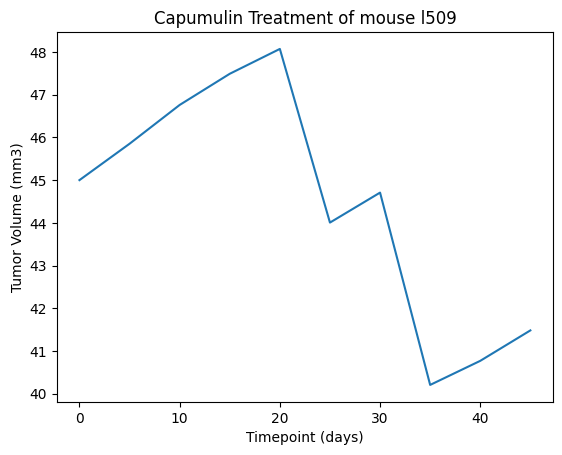

In [143]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capolulin (e.g., 'l509')
mouse_id = 'l509'
mouse_data = merged_df[merged_df['Mouse ID'] == mouse_id]

# Generate a line plot 
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capumulin Treatment of mouse {mouse_id}')
plt.show()

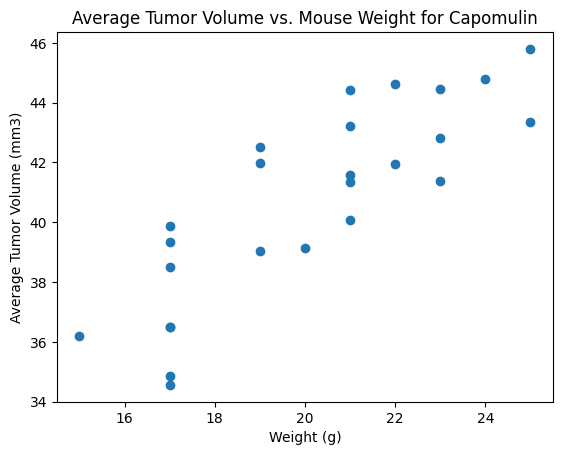

In [144]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume for each mouse on Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with mouse metadata to get weight
avg_tumor_volume_df = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Create scatter plot
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


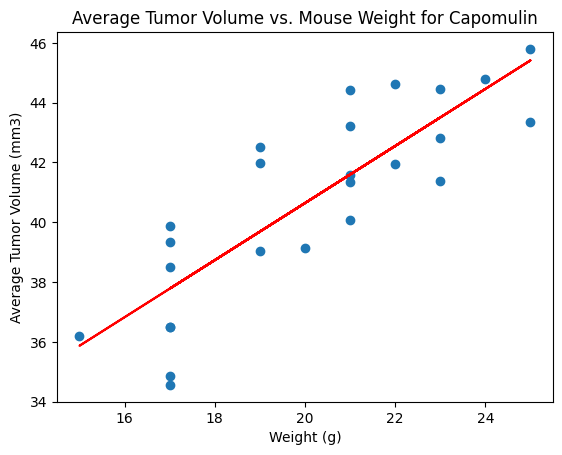

In [151]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse on Capomulin
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge this series with the mouse metadata DataFrame to get the corresponding weight
avg_tumor_vol_df = pd.merge(avg_tumor_vol, mouse_metadata, on='Mouse ID', how='left')

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol_df["Weight (g)"], avg_tumor_vol_df["Tumor Volume (mm3)"])
regress_values = avg_tumor_vol_df["Weight (g)"] * slope + intercept

# Generate a scatter plot of mouse weight versus average tumor volume
plt.scatter(avg_tumor_vol_df["Weight (g)"], avg_tumor_vol_df["Tumor Volume (mm3)"])

# Plot the linear regression line
plt.plot(avg_tumor_vol_df["Weight (g)"],regress_values,"r-")

# Set labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")

# Print the correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is: {rvalue:.2f}")

# Display the plot
plt.show()